**Let us import the required libraries.**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
df = sn.load_dataset('tips')

In [5]:
df.shape

(244, 7)

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [6]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [8]:
df.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [13]:
df['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [ ]:
## two sample independent test

test the claim  tips changes with repspect to gender

In [14]:
## Test of normality(Shapiro)
st.shapiro(df.tip)

ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12)

C:\Users\malli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

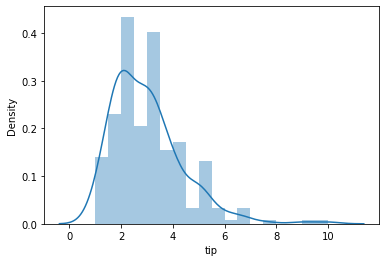

In [15]:
sn.distplot(df.tip)

In [4]:
mt = df[df.sex=='Male']['tip']
ft = df[df.sex=='Female']['tip']

In [25]:
print(st.shapiro(ft), st.shapiro(mt))

ShapiroResult(statistic=0.9567776918411255, pvalue=0.005448382347822189) ShapiroResult(statistic=0.8758689165115356, pvalue=3.708431339788376e-10)


In [ ]:
## since p value <alpha--> data != normal
## Hence go for non parametric

In [27]:
mt.median()

3.0

In [5]:
print(len(mt), len(ft))

157 87


In [28]:
ft.median()

2.75

In [26]:
## H0: pop _median_tip_male = pop_median_tip_female
## H1: pop_median_tip_male != pop_median_tip_female

1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64

In [29]:
st.mannwhitneyu(mt,ft)

MannwhitneyuResult(statistic=6369.5, pvalue=0.19167724679681963)

In [ ]:
## pvalue > alpha (0.05)---> accept H0
## There is no difference of median tip value for male and female
## Tip does not depend on gender

In [30]:
## if the assuptions are satisfied 
st.ttest_ind(mt,ft)

Ttest_indResult(statistic=1.3878597054212687, pvalue=0.16645623503456763)

In [ ]:
## Paired t test 
## 

An energy drink distributor claims that a new advertisement poster, featuring a life-size picture of a well-known athlete, will increase the product sales in outlets by an average of 50 bottles in a week. For a random sample of 10 outlets, the following data was collected. Test that the null hypothesis that there the advertisement was effective in increasing sales. Test the hypothesis using critical region technique. Use α = 0.05.
Given data:

    sales_before = [33, 32, 38, 45, 37, 47, 48, 41, 45,43]
    sales_after = [42, 35, 31, 41, 37, 36, 49, 49, 48,52]

In [6]:
sb = np.array([33, 32, 38, 45, 37, 47, 48, 41, 45,43])
sa = np.array([42, 35, 31, 41, 37, 36, 49, 49, 48,52])

In [8]:
diff = sa-sb
diff

array([  9,   3,  -7,  -4,   0, -11,   1,   8,   3,   9])

In [9]:
## Test of normality
st.shapiro(diff)

ShapiroResult(statistic=0.9319658279418945, pvalue=0.4675050675868988)

In [ ]:
## since p value >0.05 --> accept H0-- >Pop diff follows normal

In [ ]:
## H0: mu_d = 0
## H1: mu_d !=0

In [12]:
alpha=0.05
mu_d =0
n= len(diff)
dbar = diff.mean()
sd= diff.std(ddof=1)
std_er = sd/np.sqrt(n)
t_st = (dbar-mu_d)/std_er
t_crit = st.t.isf(alpha/2,n-1)
p_val = st.t.sf(abs(t_st),n-1)*2
print(t_st, t_crit, p_val)
print(st.t.interval(1-alpha,n-1,dbar,std_er))

0.5098691784525046 2.262157162740992 0.6224105888919785
(-3.7804143968213757, 5.980414396821375)


## CVA :

Since abs(t_stat) < abs(t_crit) ---> accept H0 

## PVA:

since p_value >alpha ----> accept H0

## CI A
since mu_d ( 0) lies b/w the limits of confidence Interval --> accept H0


In [13]:
st.ttest_rel(sa,sb)

Ttest_relResult(statistic=0.5098691784525045, pvalue=0.6224105888919786)

In [14]:
st.ttest_1samp(diff,mu_d)

Ttest_1sampResult(statistic=0.5098691784525045, pvalue=0.6224105888919786)

In [ ]:

## test the claim of will increase the product sales in outlets by an average of 50 bottles in a week.

## H0: mu =50
## H1: mu != 50

In [20]:
st.ttest_1samp(sa,50)

Ttest_1sampResult(statistic=-3.5157524118542858, pvalue=0.0065590614445979935)

In [ ]:
## Since p value(0.0065) is less than alpha (0.05)--> reject H0
## mu is not equal to 50

In [ ]:
## H0: mu>=50
## H1: mu <50

In [21]:
st.ttest_1samp(sa,50,alternative='less')

Ttest_1sampResult(statistic=-3.5157524118542858, pvalue=0.0032795307222989968)

In [ ]:
## Since p value ( 0.003) is less than alpha (0.05)--> reject H0
## Concluding that the sales not increased to 50 bottles in a week.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
## test the claim that the avg tip is not same on all the days

In [23]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [24]:
tp_sat = df[df.day=='Sat']['tip']
tp_sun = df[df.day=='Sun']['tip']
tp_thu = df[df.day=='Thur']['tip']
tp_fri = df[df.day=='Fri']['tip']

In [25]:
df.groupby('day')['tip'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,2.771452,1.240223,1.25,2.0000,2.305,3.3625,6.70
Fri,19.0,2.734737,1.019577,1.00,1.9600,3.000,3.3650,4.73
Sat,87.0,2.993103,1.631014,1.00,2.0000,2.750,3.3700,10.00
Sun,76.0,3.255132,1.234880,1.01,2.0375,3.150,4.0000,6.50


C:\Users\malli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='tip'>

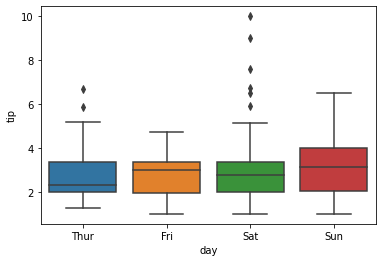

In [26]:
sn.boxplot(df.day,df.tip)

In [ ]:
# H0: mu_sat = mu_Thur=mu_fri =mu_Sun
# H1: Any two are different 

In [27]:
## test of normality 
st.shapiro(tp_sat)

ShapiroResult(statistic=0.8243008852005005, pvalue=8.842056864466485e-09)

In [29]:
## test of variance equality
st.levene(tp_sat,tp_sun,tp_fri,tp_thu)

LeveneResult(statistic=0.5519761112415968, pvalue=0.6472822314837223)

In [ ]:
## Sicne p -value is >0.05 ---> accept H0.----> the variances are equal

In [ ]:
## Since normality test is failed , go for non parametric test ( Kruskal wallis test)

In [ ]:
# H0: median_sat = median_Thur=median_fri =median_Sun
# H1: Any two are different 

In [28]:
st.kruskal(tp_sat,tp_sun,tp_thu,tp_fri)

KruskalResult(statistic=8.565587588927054, pvalue=0.035660560194476144)

In [ ]:
# since p value(0.03)<alpha(0.05)---> reject Ho
## There is a difference in the median values 

In [ ]:
## Post hoc analysis  ( Tukey HSD)

In [32]:
st.f_oneway(tp_sat,tp_sun,tp_thu,tp_fri)

F_onewayResult(statistic=1.6723551980998697, pvalue=0.1735885553040592)

In [30]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [31]:
pairwise_tukeyhsd(df.tip,df.day).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Fri,Sat,0.2584,0.8697,-0.6444,1.1611,False
Fri,Sun,0.5204,0.4571,-0.394,1.4348,False
Fri,Thur,0.0367,0.9,-0.8981,0.9715,False
Sat,Sun,0.262,0.6061,-0.2977,0.8218,False
Sat,Thur,-0.2217,0.7424,-0.8142,0.3709,False
Sun,Thur,-0.4837,0.1726,-1.0938,0.1264,False


In [ ]:
## Proportion test 
## One sample proportion test

In [33]:
df.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [34]:
93/244

0.38114754098360654

In [ ]:
## test the claim that the smoking proportion is 40%. they collected the sample data (tips data set).

In [36]:
P=0.4
n= 244
x = 93
p = x/n
alpha=0.05

In [ ]:
## H0: P=0.4
## H1: P!=0.4

In [38]:
std_er = np.sqrt(p*(1-p)/n)
z_stat = abs((p-P)/std_er)
z_crit = st.norm.isf(alpha/2)
p_val = st.norm.sf(abs(z_stat))*2
print(z_stat,z_crit,p_val)

0.6063491832694735 1.9599639845400545 0.5442829052719291


In [39]:
from statsmodels.stats.proportion import proportions_ztest

In [40]:
proportions_ztest(x,n,P)

(-0.6063491832694735, 0.5442829052719291)

In [ ]:
## Z prortion test ( two samples)

In [ ]:
## test the claim that the smoking proportion is different for different gender they collected the sample data (tips data set).

In [41]:
pd.crosstab(df['smoker'],df['sex'])

sex,Male,Female
smoker,,
Yes,60,33
No,97,54


In [ ]:
## H0: Pm =Pf --> Pm-Pf=0
## H1: Pm!=Pf--> Pm-Pf !=0

In [45]:
alpha=0.05
xm = 60
nm= 157
pm= xm/nm
xf = 33
nf = 87
pf=xf/nf
p = (xm+xf)/(nm+nf)
q= 1-p
std_er =np.sqrt(p*q*((1/nm)+(1/nf)))
z_stat = (pm-pf)/std_er
z_crit = st.norm.isf(alpha/2)
p_val = st.norm.sf(abs(z_stat))*2
print(z_stat,z_crit,p_val)

0.043986572230939734 1.9599639845400545 0.9649151073157315


In [47]:
proportions_ztest([xm,xf],[nm,nf])

(0.043986572230939734, 0.9649151073157315)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
## test of Association( Chi-Square test)

In [ ]:
## Is there any association between smoking and day 

In [56]:
## H0: There is no association b/w smoking and day
## H1: There is an association b/w smoking and day

In [59]:
contigency_table = pd.crosstab(df.smoker,df.day)
contigency_table

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,17,15,42,19
No,45,4,45,57


In [63]:
chi_crit = st.chi2.isf(alpha,3)
chi_crit

7.814727903251178

In [64]:
st.chi2_contingency(contigency_table)

(25.787216672396262,
 1.0567572499836523e-05,
 3,
 array([[23.63114754,  7.24180328, 33.15983607, 28.96721311],
        [38.36885246, 11.75819672, 53.84016393, 47.03278689]]))

In [65]:
st.chi2.sf(25.787216672396262,3)

1.0567572499836523e-05

In [ ]:
## Since p -value (close to 0)<alpha(0.05)---> reject H0
## Yes there is an association b/w smoking and day

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
from statsmodels.formula.api import ols

ANOVA

In [4]:
df_machine = pd.DataFrame(data = {'machine': ['machine_A','machine_B','machine_C','machine_D']*5, 
                                  'strength': [68.7, 62.7, 55.9, 80.7, 75.4, 68.5, 56.1, 70.3, 70.9, 63.1, 57.3, 80.9, 79.1, 
                                               62.2, 59.2, 85.4, 78.2, 60.3, 50.1, 82.3]})

In [5]:
df_machine.shape

(20, 2)

In [6]:
df_machine

,machine,strength
0,machine_A,68.7
1,machine_B,62.7
2,machine_C,55.9
3,machine_D,80.7
4,machine_A,75.4
5,machine_B,68.5
6,machine_C,56.1
7,machine_D,70.3
8,machine_A,70.9
9,machine_B,63.1


In [8]:
a = df_machine[df_machine.machine=='machine_A']['strength']
b= df_machine[df_machine.machine=='machine_B']['strength']
c= df_machine[df_machine.machine=='machine_C']['strength']
d = df_machine[df_machine.machine=='machine_D']['strength']

In [9]:
a

0     68.7
4     75.4
8     70.9
12    79.1
16    78.2
Name: strength, dtype: float64

In [10]:
st.f_oneway(a,b,c,d)

F_onewayResult(statistic=32.03072350199285, pvalue=5.375613532781072e-07)

In [11]:
f_crit = st.f.isf(0.05,3,16)
f_crit

3.238871517453585

In [12]:
p_val = st.f.sf(32.03072350199285,3,16)
p_val

5.375613532781072e-07

In [ ]:
## based on CVA : Since f_stat >f_crit ---> reject H0
## Based on PVA : since p _value (close to 0)<alpha(0.05)---> reject H0

## hence the pop means are not same , any two pop means are different

In [13]:
from statsmodels.stats.anova import anova_lm

In [15]:
m1= ols('strength~machine', data=df_machine).fit()
anova_table = anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
machine,3.0,1778.0655,592.68850,32.030724,5.375614e-07
Residual,16.0,296.0600,18.50375,NaN,NaN


In [ ]:
## POST HOC

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [28]:
pairwise_tukeyhsd(df_machine.strength,df_machine.machine).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
machine_A,machine_B,-11.1,0.0044,-18.8842,-3.3158,True
machine_A,machine_C,-18.74,0.001,-26.5242,-10.9558,True
machine_A,machine_D,5.46,0.2265,-2.3242,13.2442,False
machine_B,machine_C,-7.64,0.0553,-15.4242,0.1442,False
machine_B,machine_D,16.56,0.001,8.7758,24.3442,True
machine_C,machine_D,24.2,0.001,16.4158,31.9842,True


## Goodness of fit

Test the random machine is fit for randomness? the data is collected for 100 observations 

A: 21

B: 23

C: 19

D: 18

E: 19

In [18]:
obs = np.array([21,23,19,18,19])
exp = np.array([20,20,20,20,20])

In [19]:
## H0: obs = exp ( It fits for randomness)
## H1: obs != exp ( It does not fit for randomness)

In [21]:
chi_square_stat = ((obs-exp)**2/exp).sum()
chi_square_stat

0.8

In [23]:
chi_square_crit = st.chi2.isf(0.05,4)
chi_square_crit

9.487729036781158

In [24]:
st.chisquare(obs,exp)

Power_divergenceResult(statistic=0.8, pvalue=0.938448064449895)

In [26]:
## P_value
st.chi2.sf(0.8,4)

0.938448064449895

In [ ]:
## CVA : since chisquare_stat <chisquare_crititcal ---> accept H0
## PVA: p value >alpha(0.05)---> accept H0

## Yes, it is fit for goodness ( randomness)